In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


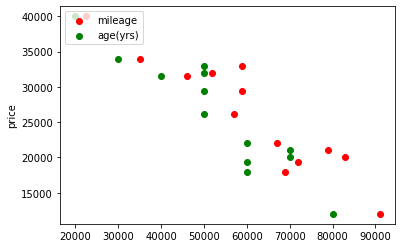

In [8]:
# visualize dataset to check linear regression relationship between mileage&age and price
plt.ylabel('price')
plt.scatter(df.Mileage,df['Sell Price($)'],color='red',label="mileage")
plt.scatter(df['Age(yrs)']*10000,df['Sell Price($)'],color='green',label='age(yrs)')
plt.legend(loc="upper left")

# One-hot-encoding: Using pandas to create dummy variables

In [15]:
dummies = pd.get_dummies(df['Car Model'])
merged = pd.concat([df, dummies], axis='columns')
merged 

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


## Dummy Variable Trap

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you. In general it’s a good practice that you drop it on your own. 

In [16]:
# Drop one dummy variable to avoid dummy variable trap
final = merged.drop(['Audi A5', 'Car Model'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [23]:
X = final.drop(['Sell Price($)'], axis='columns')
y = final['Sell Price($)']
ohpd = LinearRegression().fit(X,y)

In [49]:
ohpd.coef_

array([-3.70122094e-01, -1.33245363e+03, -4.28466659e+03,  2.45354074e+03])

In [50]:
ohpd.intercept_

56523.08523127495

In [25]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
ohpd.predict([[45000, 4, 0, 1]])

array([36991.31721061])

In [26]:
# 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
ohpd.predict([[86000, 7, 1, 0]])

array([11080.74313219])

In [27]:
# 3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
ohpd.score(X, y)

0.9417050937281082

# One-hot-encoding: Using sklearn OneHotEncoder

In [28]:
# use label encoder to convert categorical values into numbers first
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
car_model = le.fit_transform(df['Car Model'])
car_model

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [32]:
df_ = df
df_['Car Model'] = car_model
df_

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [35]:
# convert X into numpy arrays for sklearn 
X = df_[['Car Model', 'Mileage', 'Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [38]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [39]:
# use one hot encoder to create dummy variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# O meaning only transform the first column into one hot encoding 
ct = ColumnTransformer([('Car Model', OneHotEncoder(), [0])], remainder = 'passthrough')

In [40]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [41]:
# drop one redundant dummy variable to avoid the dummy variable trap
X = X[:, 1:] # select all rows, skip the first column 
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [44]:
ohsk = LinearRegression().fit(X,y)

In [47]:
ohsk.coef_

array([-4.28466659e+03,  2.45354074e+03, -3.70122094e-01, -1.33245363e+03])

In [48]:
ohsk.intercept_

56523.08523128357

In [51]:
# 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
ohpd.predict([[0, 1, 45000, 4]])

array([-1.92744992e+08])